In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

%matplotlib inline

In [14]:
df = pd.read_csv("fashion_products.csv")
df.head()

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M


In [3]:
print(df)

     User ID  Product ID Product Name   Brand         Category  Price  \
0         19           1        Dress  Adidas    Men's Fashion     40   
1         97           2        Shoes     H&M  Women's Fashion     82   
2         25           3        Dress  Adidas  Women's Fashion     44   
3         57           4        Shoes    Zara    Men's Fashion     23   
4         79           5      T-shirt  Adidas    Men's Fashion     79   
..       ...         ...          ...     ...              ...    ...   
995       20         996        Shoes    Zara  Women's Fashion     55   
996       42         997      Sweater    Nike    Kids' Fashion     13   
997        9         998      Sweater    Zara    Men's Fashion     47   
998        8         999      T-shirt    Zara  Women's Fashion     68   
999       91        1000        Shoes  Adidas  Women's Fashion     79   

       Rating   Color Size  
0    1.043159   Black   XL  
1    4.026416   Black    L  
2    3.337938  Yellow   XL  
3    1.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       1000 non-null   int64  
 1   Product ID    1000 non-null   int64  
 2   Product Name  1000 non-null   object 
 3   Brand         1000 non-null   object 
 4   Category      1000 non-null   object 
 5   Price         1000 non-null   int64  
 6   Rating        1000 non-null   float64
 7   Color         1000 non-null   object 
 8   Size          1000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [5]:
df.duplicated().any()

np.False_

In [9]:
df.columns

Index(['User ID', 'Product ID', 'Product Name', 'Brand', 'Category', 'Price',
       'Rating', 'Color', 'Size'],
      dtype='object')

In [12]:
df = df.drop_duplicates()
df.drop = ['user id', 'product id', 'product name', 'brand', 'category', 'price', 'rating', 'color', 'size']

In [13]:
null_val = pd.DataFrame(df.isnull().sum())
null_val.columns = ['null_val']
null_val['percent_'] = round(null_val['null_val'] / len(df.index), 2) * 100
null_val.sort_values('percent_', ascending = False)[:10]

,null_val,percent_
User ID,0,0.0
Product ID,0,0.0
Product Name,0,0.0
Brand,0,0.0
Category,0,0.0
Price,0,0.0
Rating,0,0.0
Color,0,0.0
Size,0,0.0


In [15]:
len(df.index)

1000

In [31]:
rating_counts = df['Rating'].value_counts()
max_count = rating_counts.max()
most_frequent_rating = rating_counts.idxmax()

In [34]:
grouped = df.groupby('Category').agg({
    'Product ID': 'count',  # Menghitung jumlah produk
    'Rating': 'mean'        # Menghitung rata-rata rating
}).reset_index()
# Mengelompokkan data berdasarkan kategori (gender)
grouped = df.groupby('Category').agg({
    'Product ID': 'count',  # Menghitung jumlah produk
    'Rating': 'mean'        # Menghitung rata-rata rating
}).reset_index()

# Mengganti nama kolom untuk lebih jelas
grouped.columns = ['Category', 'Product Count', 'Average Rating']

# Menampilkan hasil
print(grouped)

          Category  Product Count  Average Rating
0    Kids' Fashion            351        3.034457
1    Men's Fashion            322        2.941697
2  Women's Fashion            327        2.999432


          Category  Average Rating
0    Kids' Fashion        3.034457
1    Men's Fashion        2.941697
2  Women's Fashion        2.999432
Kategori dengan rating tertinggi: Kids' Fashion dengan rating rata-rata: 3.034456961956385


C:\Users\USER\AppData\Local\Temp\ipykernel_4784\3739702224.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Average Rating', data=grouped, palette='viridis')


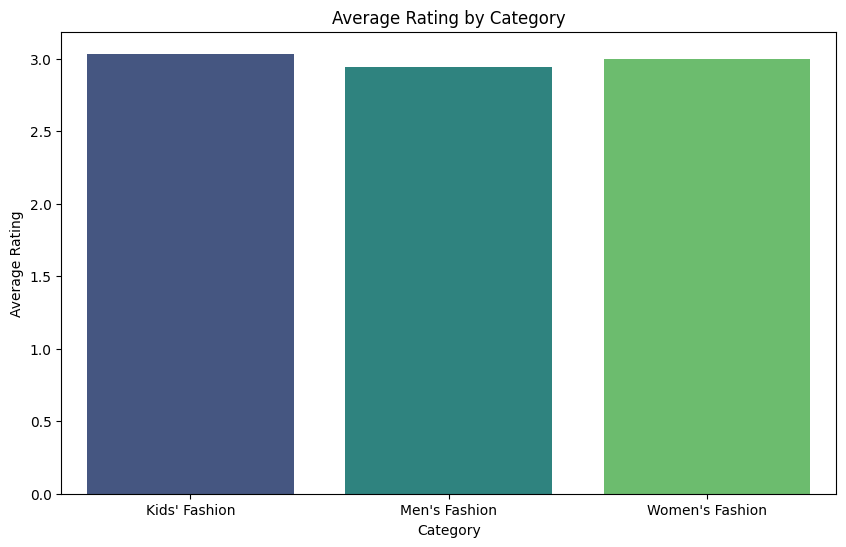

In [35]:
# Mengelompokkan data berdasarkan kategori (gender) dan menghitung rata-rata rating
grouped = df.groupby('Category').agg({
    'Rating': 'mean'        # Menghitung rata-rata rating
}).reset_index()

# Mengganti nama kolom untuk lebih jelas
grouped.columns = ['Category', 'Average Rating']

# Menemukan kategori dengan rating tertinggi
highest_rating = grouped.loc[grouped['Average Rating'].idxmax()]

# Menampilkan hasil
print(grouped)
print(f"Kategori dengan rating tertinggi: {highest_rating['Category']} dengan rating rata-rata: {highest_rating['Average Rating']}")

# Membuat Bar Plot menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Average Rating', data=grouped, palette='viridis')
plt.title('Average Rating by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.show()

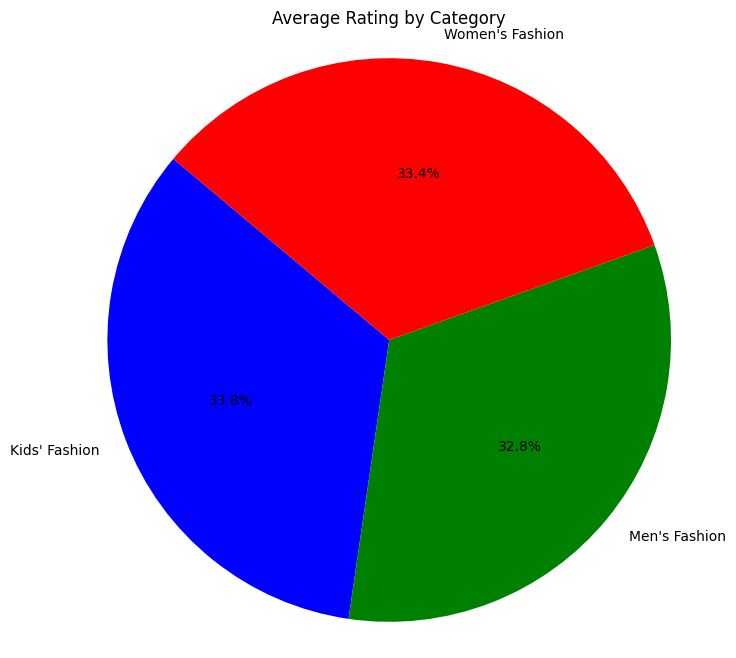

In [36]:
# Membuat Pie Chart menggunakan Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(grouped['Average Rating'], labels=grouped['Category'], autopct='%1.1f%%', startangle=140, colors=['blue', 'green', 'red'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Average Rating by Category')
plt.show()